# Crop yeild prediction using Linear Regression 

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [16]:
df=pd.read_csv('crop.csv')
df.head()

,temperature,rainfall,soil_quality,crop_yield
0,25,10,Good,500
1,30,5,Poor,400
2,22,15,Moderate,600
3,28,8,Good,550
4,26,12,Excellent,700


In [17]:
label_encoder = LabelEncoder()
df['soil_quality'] = label_encoder.fit_transform(df['soil_quality'])

# Features and target variable
x = df[['temperature', 'rainfall', 'soil_quality']]
y = df['crop_yield']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting on the test set
y_pred = model.predict(x_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R^2 score
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 16732.89177043223
R^2 Score: -25.772626832691568


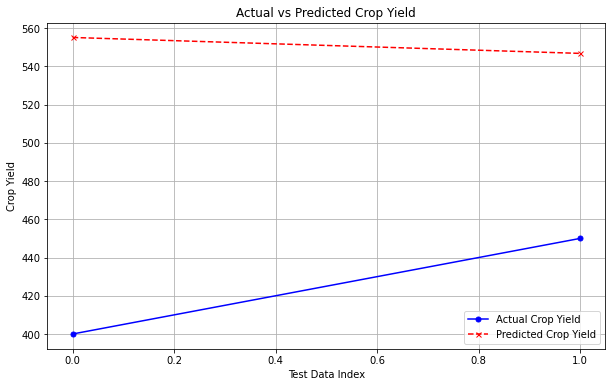

In [19]:
# Plotting a actual vs predicted crop yeild
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Crop Yield', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(y_pred, label='Predicted Crop Yield', color='red', marker='x', linestyle='--', markersize=5)
plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Test Data Index')
plt.ylabel('Crop Yield')
plt.legend()
plt.grid(True)
plt.show()